# BoomBikes Rental Assignment

### Analysis approach 
1. Data Analysis - a quick look at the data, columns, dtypes, checks to see if any cleanup required
2. Data Cleanup - Perform actual cleanup if any required 
3. Pick columns - Drop out columns manualy based on relevance 
4. Visualize data (Continuous vars) - plot correlation chart, heat map to see the data correlation  
5. Visualize data (categorical vars) - Box plot or bar chart 
6. Dataframe preparation for regression analysis 
7. Apply RFE & Manual approach for variable selection 
8. Model Building - Multiple modelds with selected variables 
9. Model Analysis - residual analysis, homescedacity, r-squared 
10. Summary and recommendations  


In [437]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import scipy as sp
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from datetime import datetime
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [438]:
import warnings
warnings.filterwarnings('ignore')

## Data Analysis 

In [439]:
# Load the data and take a peek at the data 
df_main = pd.read_csv('day.csv')

In [440]:
df_main.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [441]:
# check the data types, see if there are any object types.
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [442]:
df_main.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [443]:
# double check if the date field is all string values 
print( "Total non string values in date :", (df_main['dteday'].map(type) != str).sum())

Total non string values in date : 0


In [444]:
# season, weathersit, month, weekday are said to be categorical variables as per the data definition. double check 
print( "Season categories\n", df_main['season'].value_counts())
print( "month categories\n", df_main['mnth'].value_counts())
print( "weekday categories\n", df_main['weekday'].value_counts())
print( "weathersit categories\n", df_main['weathersit'].value_counts())

Season categories
 3    188
2    184
1    180
4    178
Name: season, dtype: int64
month categories
 1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64
weekday categories
 6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64
weathersit categories
 1    463
2    246
3     21
Name: weathersit, dtype: int64


In [445]:
# As per above, categorical values are having correct 
df_main.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)
df_main.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun', 7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'},inplace = True)
df_main.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'},inplace = True)
df_main.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

print("mapped categorical colums are\n", df_main[['season','mnth','weekday','weathersit']])

mapped categorical colums are
      season mnth weekday weathersit
0    spring  jan     sat   moderate
1    spring  jan     sun   moderate
2    spring  jan     mon       good
3    spring  jan     tue       good
4    spring  jan     wed       good
..      ...  ...     ...        ...
725  spring  dec     thu   moderate
726  spring  dec     fri   moderate
727  spring  dec     sat   moderate
728  spring  dec     sun       good
729  spring  dec     mon   moderate

[730 rows x 4 columns]


### Observations
1. There are no columns with null records 
2. The data types are none of objects except date field. 
3. The categorical variables are also falling into correct category as per data definition, and they are replaced with descriptive values
3. No specific cleanup required, so the Data Cleanup step can be marked as completed

## Pick Columns ( Manual) 

From data definition and analysis, it appears that the most suitable fields for analysis are
season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, cnt 

dteday field contains date strings, but the same info is available in form of mnth, weekday, season etc, so dropping this as well 

Remaining columns casual, registered, instant, dropping. Remaining columns, planning to be detemined to drop or not after visualization and mathematical analysis

In [446]:
df_main.drop(['instant', 'dteday', 'casual', 'registered'], axis = 1, inplace = True)
df_main.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

## Visualization - Continuous vars


In [447]:
#defining some utility function for plotting, 
#this is with the intention to reuse it for multiple data sets, or within a same dataset. 

def box_plot(df, figw, figh, col_names,figr=1, figc=4):
    plt.figure(figsize=(figw,figh))
    for idx, col in enumerate(col_names):
        plt.subplot(figr,figc,idx + 1)
        sns.boxplot(y=col, data=df)


def box_plot_categorical(df,figw, figh, target, col_names,figr=1, figc=4):
    plt.figure(figsize=(figw, figh))
    for idx, col in enumerate(col_names):
        plt.subplot(figr,figc,idx+1)
        sns.boxplot(data=df, x=col, y=target)
    plt.show()
        
def pair_plot(df,figw, figh, col_names):
    plt.figure(figsize = (figw,figh))
    sns.pairplot(data=df,vars=col_names)
    plt.show()
    
def corr_plot(df,figw, figh):
    corr = df.corr()
    plt.figure(figsize=(figw,figh))
    sns.heatmap(corr,annot=True )
    plt.show()
    
def regression_plot(df,figw,figh,y_axis,x_axis):
    plt.figure(figsize=(figw,figh))
    sns.regplot(data=df,y=y_axis,x=x_axis)
    plt.title(x_axis + " vs " + y_axis)
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.show()


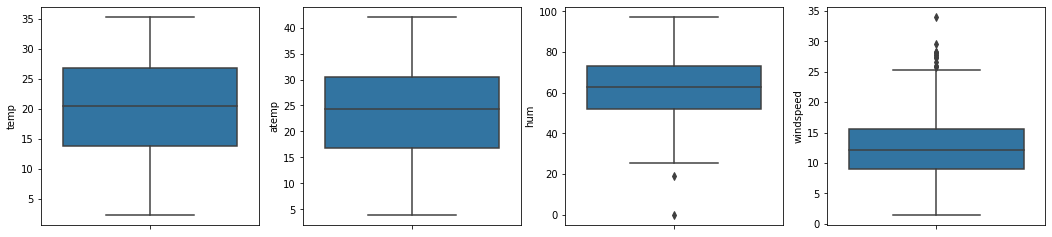

In [448]:
#Visualize the continuous variable values to see how their distribution is. 
box_plot(df_main, 18, 4, ['temp', 'atemp', 'hum', 'windspeed'])


In [449]:
#the figure shows there no much outliers, do a python check as well to see exact numbers 
df_tmp = df_main[['cnt','temp', 'atemp', 'hum', 'windspeed']]
Q1 = df_tmp.quantile(0.25)
Q3 = df_tmp.quantile(0.75)
IQR = Q3 - Q1
((df_tmp < (Q1 - 1.5 * IQR)) | (df_tmp > (Q3 + 1.5 * IQR))).sum()

cnt           0
temp          0
atemp         0
hum           2
windspeed    13
dtype: int64

In [450]:
#OK, not many outliers, not bothering much, now plot a heat map and the corr 

<Figure size 1080x3600 with 0 Axes>

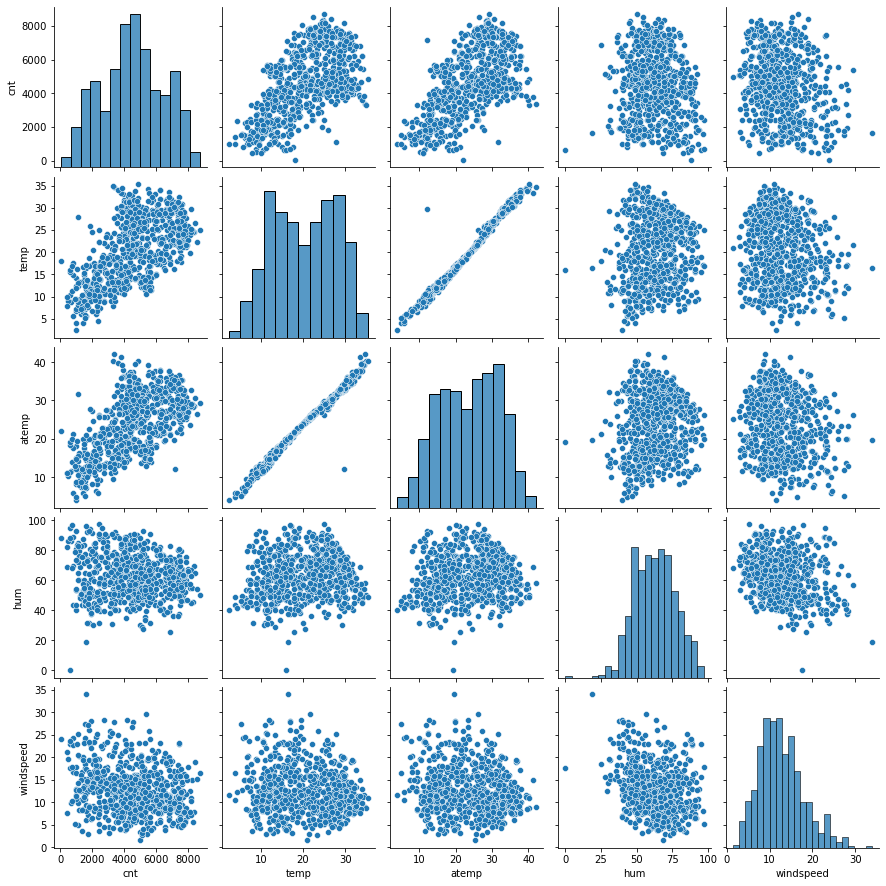

In [451]:
#draw pair plots for finding the relation
pair_plot(df_main,15,50,['cnt', 'temp', 'atemp', 'hum','windspeed'])

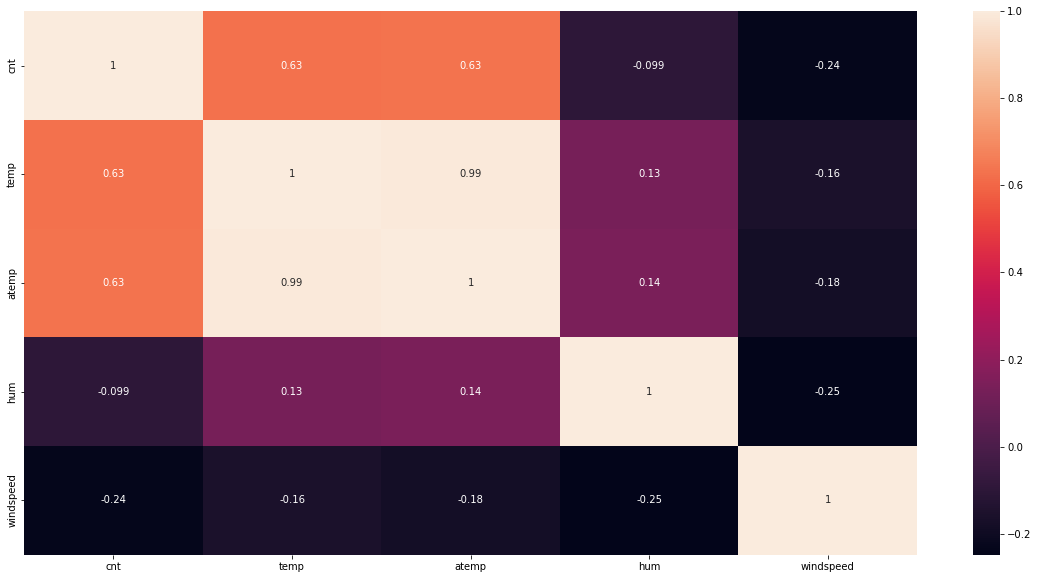

In [452]:
corr_plot(df_tmp,20,10)

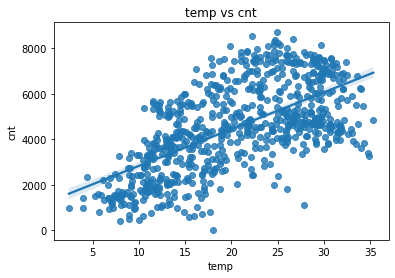

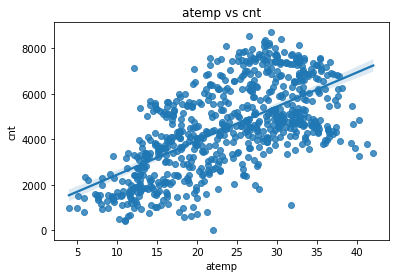

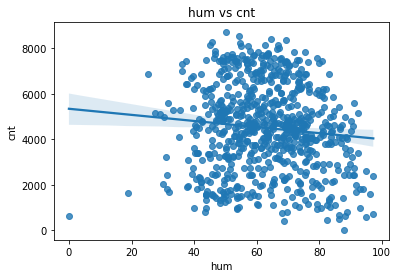

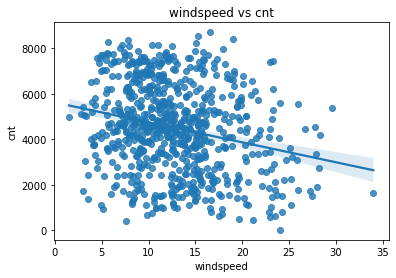

In [453]:
# From the above, mostly the correlation between various variables and cnt is obvious, drawing regplot as well 
regression_plot(df_main,6,4,x_axis='temp',y_axis='cnt')
regression_plot(df_main,6,4,x_axis='atemp',y_axis='cnt')
regression_plot(df_main,6,4,x_axis='hum',y_axis='cnt')
regression_plot(df_main,6,4,x_axis='windspeed',y_axis='cnt')

### Observations
1. As seen from visualuzation, there is linear relationship betwen cnt and temp, atemp  
2. There seems high correlation between temp, atemp variable. Since the high correlation between independent variables is not preferred, one of them can be drppped
2. Humidity, Windspeed are -vely correlated. So, probably not a good time to push more ads during these situations. Yet to figure out scientifically. However, humidy, and temperature, the values are scattered and many are away from the regression line

## Visualize data (categorical vars)

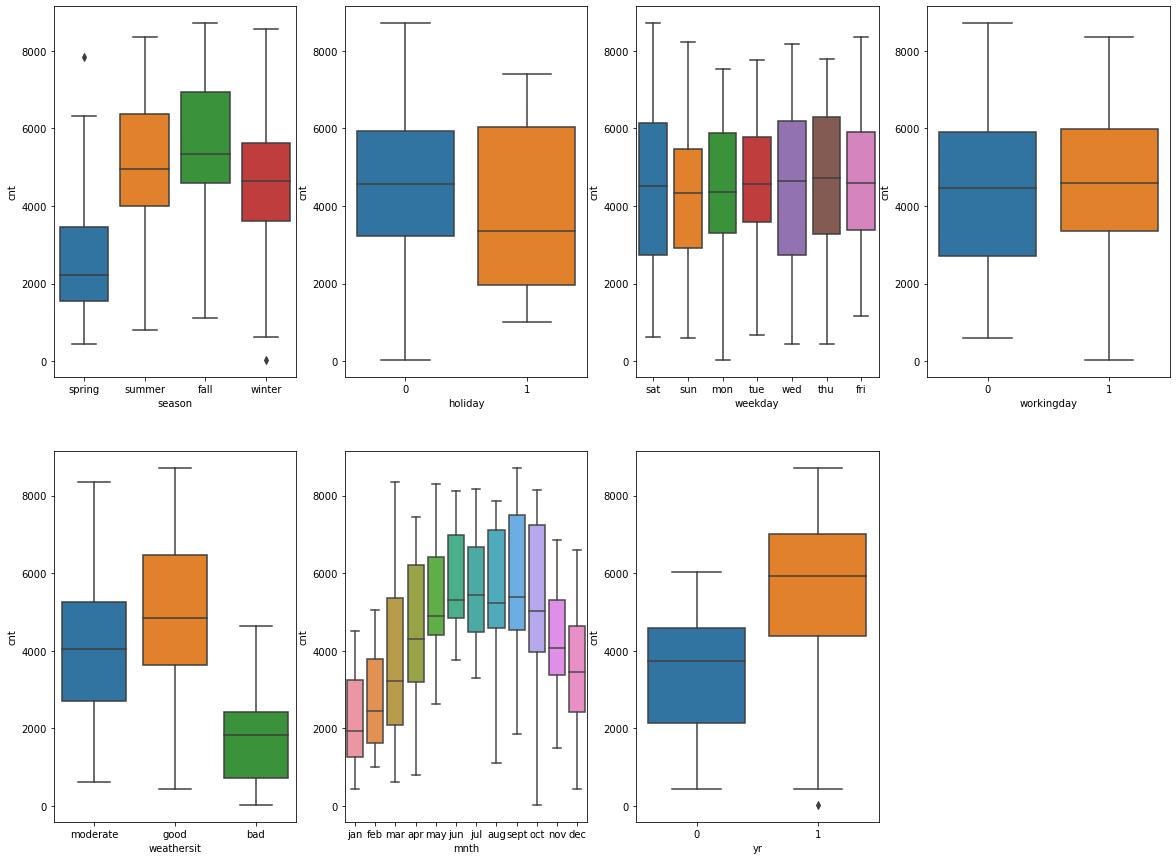

In [454]:
cat_cols = ['season','holiday','weekday','workingday','weathersit','mnth','yr']
box_plot_categorical(df_main,20,15,'cnt', cat_cols,figr=2,figc=4)

### Observations
1. Fall season having highest number of cnt 
2. when it is holiday, the cnt is more.
3. Saturday seems to be having highest number of cnt
4. Working day, the usage is more 
5. When weather situation is good, the cnt is more 
6. month is having good effect on the cnt as well, this is mostly due to the 
7. year 2019 having highest cnt, this seems to be beacause year on year, the business is improving


### Dataframe preparation for regression analysis 
Mainly activities in this step are:
1. Convert categorical variables to dummies 
2. Split the data set to train and test
3. Scale the columns

In [455]:
#Now, possibly can go ahead with linear regression, before which the dummies to be substituted 
#now, it is possible to drop_first to reduce the column requirement by n-1 where n is the level of the categorical value
#but since the dataset is not so big, attempting without drop_first=True 
## OK i did a few experimetns with drop_first not included, this causes some of the obvious variables to to be 
#taking back seat such as year when it comes to ranking. adding drop_first=True, with this a decent model built with 
#82% r2 as a final one.
df_main = pd.get_dummies(data=df_main,columns=["season","weathersit", "mnth","weekday"],drop_first=True)
# df_main = pd.get_dummies(data=df_main,columns=["season","weathersit", "mnth","weekday"])
print(df_main.columns)
df_main.head(10)

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter',
       'weathersit_good', 'weathersit_moderate', 'mnth_aug', 'mnth_dec',
       'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar', 'mnth_may',
       'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon', 'weekday_sat',
       'weekday_sun', 'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,1,8.378268,11.66045,51.8261,6.000868,1606,1,0,...,0,0,0,0,0,0,0,1,0,0
6,0,0,1,8.057402,10.44195,49.8696,11.304642,1510,1,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,6.765000,8.11270,53.5833,17.875868,959,1,0,...,0,0,0,0,0,1,0,0,0,0
8,0,0,0,5.671653,5.80875,43.4167,24.250650,822,1,0,...,0,0,0,0,0,0,1,0,0,0
9,0,0,1,6.184153,7.54440,48.2917,14.958889,1321,1,0,...,0,0,0,0,1,0,0,0,0,0


In [456]:
#now, split the df into train and test

y=df_main['cnt']
df_main.drop(['cnt'], axis = 1, inplace = True)
X=df_main


In [457]:
#For testing, planning to take 20% of data, so training set will be 80%, and also setting random_state , seed to none
#to be non deterministic 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)
print("X_train :", X_train)
print("y_train :", y_train)
print("X_test :", X_test)
print("y_test :", y_test)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train :      yr  holiday  workingday       temp     atemp      hum  windspeed  \
606   1        0           1  28.973347  32.63895  59.0417   5.166819   
480   1        0           1  20.431653  24.17915  75.6667  11.833875   
346   0        0           1  11.582500  15.05690  59.0000   9.416850   
725   1        0           1  10.420847  11.33210  65.2917  23.458911   
410   1        0           1  14.281653  17.58145  53.1250  12.167200   
..   ..      ...         ...        ...       ...      ...        ...   
101   0        0           1  20.602500  24.65270  73.9167  18.416893   
160   0        0           1  30.955000  35.16460  60.5000   9.417118   
393   1        0           0  11.582500  13.63605  31.1250  16.083350   
698   1        0           1  12.231653  16.19335  64.9583   3.917544   
157   0        0           1  29.007500  32.79750  59.7917  12.583136   

     season_spring  season_summer  season_winter  ...  mnth_may  mnth_nov  \
606              0              0   

In [458]:
#final step in the dataframe preparation will be to scale the variables
#apply normalization 
vars_to_scale = ['temp','atemp','hum','windspeed']
scaler = MinMaxScaler()
#apply scaling for training set 
X_train[vars_to_scale] = scaler.fit_transform(X_train[vars_to_scale])
#describe the frame and see to make sure the values normalized 
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,...,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.511986,0.027397,0.678082,0.542993,0.518168,0.643405,0.318181,0.248288,0.255137,0.243151,...,0.083904,0.075342,0.087329,0.083904,0.154110,0.142123,0.152397,0.136986,0.136986,0.128425
std,0.500285,0.163378,0.467612,0.228066,0.214392,0.150048,0.171525,0.432390,0.436312,0.429353,...,0.277482,0.264169,0.282558,0.277482,0.361363,0.349476,0.359714,0.344128,0.344128,0.334849
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.344526,0.339999,0.529777,0.193797,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.552460,0.538995,0.641816,0.294082,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.741704,0.694247,0.750428,0.414527,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


OK got everything now mostly to start building the model!!


In [459]:
# Using SKLearn for making the model 
lr = LinearRegression()
lr.fit(X_train,y_train)
#take 20 columns 
rfe = RFE(lr,20)
rfe.fit(X_train,y_train)

#for easy manipulation, store the values into a DF and sort based on rank. Lowest rank ones 
#could be selected for further analysis 
df = pd.DataFrame()
df['col'] = ''
df['support'] = False 
df['rank'] = 0


for col, support, ranking in zip(X_train.columns,rfe.support_,rfe.ranking_):
    df.loc[len(df.index)] = [col, support, ranking]
df.sort_values("rank", inplace=True)
print ('df is \n',df) 
#select only the ones having lowest rank value, 
df_selected = df[ df['rank'] == 1]
# print("Selected ones are \n",df_selected)
rfe_selected_cols = df_selected['col'].tolist()
print ('rfe_selected_cols ::\n', rfe_selected_cols)

df is 
                     col  support  rank
0                    yr     True     1
25          weekday_sun     True     1
24          weekday_sat     True     1
22            mnth_sept     True     1
20             mnth_nov     True     1
19             mnth_may     True     1
16             mnth_jul     True     1
15             mnth_jan     True     1
13             mnth_dec     True     1
11  weathersit_moderate     True     1
14             mnth_feb     True     1
9         season_winter     True     1
1               holiday     True     1
2            workingday     True     1
3                  temp     True     1
4                 atemp     True     1
10      weathersit_good     True     1
5                   hum     True     1
6             windspeed     True     1
7         season_spring     True     1
23          weekday_mon    False     2
27          weekday_tue    False     3
17             mnth_jun    False     4
21             mnth_oct    False     5
8         season_

In [460]:
#define utility methods for building model, VIF calculation etc for manual method 
def model_fn(cols, ytrain, xtrain):
    # add intercept as the stats model does not add it by default 
    sm_xtrain = sm.add_constant(xtrain[cols])
    #fit the model to the given columns
    lm = sm.OLS(ytrain, sm_xtrain).fit()
    print(lm.summary())
    return lm

# utility method for computing VIF for all the columns names 
def vif_fn(cols,ytrain,xtrain):
    df1 = xtrain[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [461]:
cols = rfe_selected_cols

model_fn(cols,y_train,X_train)
vif_fn(cols,y_train,X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     154.1
Date:                Thu, 21 Apr 2022   Prob (F-statistic):          7.42e-209
Time:                        07:25:32   Log-Likelihood:                -4712.9
No. Observations:                 584   AIC:                             9466.
Df Residuals:                     564   BIC:                             9553.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1020.2719    

In [462]:
# Dropping the variable which are having high -ve coefficients here and that are quite insignificant as it has high p-value
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring', 'season_summer', 
        'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat', 'weathersit_good', 'weathersit_moderate']
model_fn(cols,y_train,X_train)
vif_fn(cols,y_train,X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     199.4
Date:                Thu, 21 Apr 2022   Prob (F-statistic):          1.01e-208
Time:                        07:25:32   Log-Likelihood:                -4726.8
No. Observations:                 584   AIC:                             9484.
Df Residuals:                     569   BIC:                             9549.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 641.8127    

In [463]:
# Dropping the variable hum as it has negative coefficient and is insignificant 
cols = ['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_spring', 'season_summer', 'season_winter',
        'mnth_jul', 'mnth_sept', 'weekday_sat', 'weathersit_good', 'weathersit_moderate']
model_fn(cols,y_train,X_train)
vif_fn(cols,y_train,X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     203.9
Date:                Thu, 21 Apr 2022   Prob (F-statistic):          1.74e-204
Time:                        07:25:32   Log-Likelihood:                -4739.6
No. Observations:                 584   AIC:                             9507.
Df Residuals:                     570   BIC:                             9568.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -727.3389    

In [464]:
# Dropping the variable holiday as it has negative coefficient and is insignificant
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring', 'season_summer', 'season_winter', 'mnth_jul',
        'mnth_sept', 'weekday_sat', 'weathersit_good', 'weathersit_moderate']
model_fn(cols,y_train,X_train)
vif_fn(cols,y_train,X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     218.6
Date:                Thu, 21 Apr 2022   Prob (F-statistic):          2.03e-204
Time:                        07:25:33   Log-Likelihood:                -4742.6
No. Observations:                 584   AIC:                             9511.
Df Residuals:                     571   BIC:                             9568.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -777.3985    

In [465]:
# Dropping the variable mnth_jul as it has negative coefficient and is insignificant
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring', 'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat','weathersit_good', 'weathersit_moderate']
model_fn(cols,y_train,X_train)
vif_fn(cols,y_train,X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     235.4
Date:                Thu, 21 Apr 2022   Prob (F-statistic):          4.24e-204
Time:                        07:25:33   Log-Likelihood:                -4746.1
No. Observations:                 584   AIC:                             9516.
Df Residuals:                     572   BIC:                             9569.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -872.3337    

In [466]:
# Dropping the variable temp as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'workingday', 'windspeed', 'season_spring', 'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_good', 'weathersit_moderate']
model_fn(cols,y_train,X_train)
vif_fn(cols,y_train,X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     172.4
Date:                Thu, 21 Apr 2022   Prob (F-statistic):          1.64e-165
Time:                        07:25:34   Log-Likelihood:                -4839.9
No. Observations:                 584   AIC:                             9702.
Df Residuals:                     573   BIC:                             9750.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2087.7716    

In [467]:
cols = ['yr', 'workingday', 'windspeed', 'mnth_jul', 'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_good', 'weathersit_moderate']
model_fn(cols,y_train,X_train)
vif_fn(cols,y_train,X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     84.86
Date:                Thu, 21 Apr 2022   Prob (F-statistic):          3.23e-106
Time:                        07:25:34   Log-Likelihood:                -4980.0
No. Observations:                 584   AIC:                             9982.
Df Residuals:                     573   BIC:                         1.003e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 581.0181    

In [468]:
cols = ['yr', 'workingday', 'windspeed', 'mnth_jul', 'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_good', 'weathersit_moderate']
model_fn(cols,y_train,X_train)
vif_fn(cols,y_train,X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     84.86
Date:                Thu, 21 Apr 2022   Prob (F-statistic):          3.23e-106
Time:                        07:25:35   Log-Likelihood:                -4980.0
No. Observations:                 584   AIC:                             9982.
Df Residuals:                     573   BIC:                         1.003e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 581.0181    

In [469]:
cols = ['yr', 'workingday', 'season_spring', 'mnth_jul', 'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_good', 'weathersit_moderate']
model_fn(cols,y_train,X_train)
vif_fn(cols,y_train,X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     163.4
Date:                Thu, 21 Apr 2022   Prob (F-statistic):          1.35e-160
Time:                        07:25:35   Log-Likelihood:                -4851.5
No. Observations:                 584   AIC:                             9725.
Df Residuals:                     573   BIC:                             9773.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1603.7769    

In [470]:
#replacing sat with sun to see 
cols = ['yr', 'workingday', 'season_spring', 'mnth_jul','season_summer', 'season_winter', 'mnth_sept', 'weekday_sun','weathersit_good', 'weathersit_moderate']
model_fn(cols,y_train,X_train)
vif_fn(cols,y_train,X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     160.4
Date:                Thu, 21 Apr 2022   Prob (F-statistic):          7.16e-159
Time:                        07:25:36   Log-Likelihood:                -4855.6
No. Observations:                 584   AIC:                             9733.
Df Residuals:                     573   BIC:                             9781.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2000.5655    

In [471]:
cols = ['yr', 'season_spring', 'mnth_jul', 'season_winter', 'mnth_sept', 'weekday_sat', 'weathersit_good', 'weathersit_moderate', 'temp']

model_fn(cols,y_train,X_train)
vif_fn(cols,y_train,X_train)

cols_final = cols

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     263.4
Date:                Thu, 21 Apr 2022   Prob (F-statistic):          2.56e-197
Time:                        07:25:37   Log-Likelihood:                -4767.9
No. Observations:                 584   AIC:                             9556.
Df Residuals:                     574   BIC:                             9599.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -649.6753    

### Observations
1. Good value for R2, adjusted R2 and R2  almost similar number. So, we may not need to another variable to try again
2. p value for almost all variables is close to zero 
3. VIF is decent value, < 5 

This model can be used for providing recommendations 

### Model Analysis - residual analysis, homescedacity, r-squared

r2_score final : 0.8050803847597525


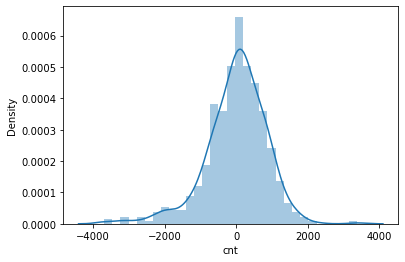

In [472]:
#for residual analysis, take the actual values from the train data set and the predicted values and plot a histogram.
#if the mean is zero and error terms are normally distributed, all good.

#having now the columns to use are found, build the final model
lr = LinearRegression()
lr.fit(X_train[cols_final],y_train)

train_pred = lr.predict(X_train[cols_final])
sns.distplot(y_train-train_pred)

#compute the r2 value. Which saw to be around 82% from when using the OLS, statsmodel, 
print ( "r2_score final :", r2_score(y_train,train_pred))

R2 on the test data : 0.8558635125351712


<AxesSubplot:xlabel='cnt', ylabel='Density'>

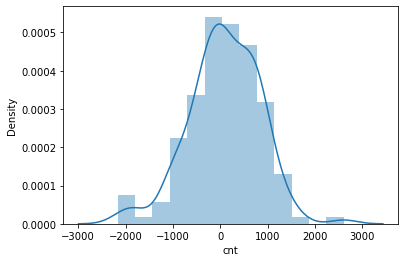

In [473]:
#now perform prediction for test dataset as well , using scalar here 
test_cols = ['temp','atemp','hum','windspeed']
X_test[test_cols] = scaler.transform(X_test[test_cols])

#Predict the values for test data
test_pred = lr.predict(X_test[cols_final])
print("R2 on the test data :", r2_score(y_test,test_pred))

#plot error terms hist also to see if it is normally distributed and mean is zero 
sns.distplot(y_test-test_pred)

### Observations
1. Here as it appears from the histogram, the error terms are normally distributedand havng mean 0.
2. r2 on test and train data set is almost the same and good 80 percent range
3. Error terms on the test data set is also normally distributed and having mean at zero. 
4. Model seems to be working well 

### The final interpretation using statsmodel to view more details 

In [474]:
lm = model_fn(cols_final,y_train, X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     263.4
Date:                Thu, 21 Apr 2022   Prob (F-statistic):          2.56e-197
Time:                        07:25:41   Log-Likelihood:                -4767.9
No. Observations:                 584   AIC:                             9556.
Df Residuals:                     574   BIC:                             9599.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -649.6753    


1. Year on year as the business is booming, post the covid situation, expected to have boom in the business
2. Spring season is -vely correlated, inorder to make profit here as the season is pleasant, there could be some offers given
3. positively correlated are winter, september, potentially less spent on ads would do here. 
4. When the weather is good, highly likely to have good business and when it is bad, this to be expected, the spent on ads could be reduced or give some offers or have some specific models fit for indoor conditions could be brought into business. 
